<h1><center><span style="color:#369;background:#fdf;padding: 10px 30px 10px 30px;border: 3px solid #369;border-radius:7px;">TP implémentation des graphes</span></center></h1>

## Objectif
Nous avons utilisé les classes Graph et DiGraph déjà toutes faites de la bibliothèque networkx. L'objectif de ce TP est de créer nous même ces classes.

Il y a plusieurs façons de les implémenter. Nous allons en voir deux :
- avec la matrice d'adjacence
- avec le dictionnaire d'adjacence

Nous utiliserons ici le module `Graphviz` pour l'affichage des graphes :

In [1]:
# Import de graphviz.
from graphviz import Graph

> Si [`graphviz`](https://www.graphviz.org/) n'est pas disponible, il faut au préalable,
> - télécharger la bibliothèque système adaptée à votre OS : [Windows: graphviz-3.0.0 (64-bit) EXE installer](https://www.graphviz.org/download/#windows)
> - puis l'installer en choisissant `Add Graphviz to the system PATH for all users`
> - enfin, installer sa bibliothèque Python dans un terminal avec la commande `pip install graphviz` 

## Implémentation d'un graphe non orienté sous forme de matrice d'adjacence

<div class="alert alert-warning" role="alert">
    
### Exercice 1
On considère la classe `Graphe` ci-dessous qu'il faudra **compléter et tester au fur et à mesure**.
    
On utilisera une matrice d'adjacence pour stocker les arêtes entre les différents sommets.  
La taille de la matrice sera spécifiée lors de la création du graphe via le paramètre `n`  
Les sommets sont accessibles par leur indice (de 0 à n-1)
    
Attention, comme le graphe n'est pas orienté, si A et B sont adjacents, il faudra faire une arête de A vers B et aussi de B vers A.
</div>

In [ ]:
class Graphe:    
    def __init__(self,n):
        ''' Le constructeur de la classe dont les attributs d'instance sont n et adj
            Exemple: G=Graphe(5) instancie un graphe d'ordre 5 de sommets 0,1,2,3,4 sans aucune arête'''
        self.n = n 
        self.adj = [[False]*n for i in range(n)] # liste d'adjacence
        
    def ajoute_arete(self,i,j):
        '''Ajoute une arête entre i et j et entre j et i'''

        self.adj[i][j] = True
        self.adj[j][i] = True
        
    def arete(self,i,j):
        '''Renvoie True s'il y a une arête entre i et j et False sinon'''
        return self.adj[i][j]
    
    def voisins(self,i):
        '''Renvoie la liste des voisins de i'''
        voisin=[]
        for j in range(len(self.adj)):
            if self.arete(i,j):
                voisin.append(j)
        return voisin
        
    
    def degre(self,i):
        '''Renvoie le degré du sommet i'''
        degres = 0

        for _ in self.voisins(i):
            degres += 1
        return degres

        
    
    def nb_aretes(self):
        '''Renvoie le nb d'arêtes du graphe'''
        nb=0
        for i in range(len(self.adj)):
            for j in range(len(self.adj)):
                if self.arete(i,j):
                    nb += 1
        return nb/2
    
    def affiche(self): 
        "Affichage du graphe en utilisant le module graphviz"
        dot = Graph('G')
        for i in range(self.n):
            for j in range(self.n): 
                # Condition pour éviter les doubles arêtes
                if self.adj[i][j] and '{} -- {}'.format(j,i) not in dot.source:
                    # dot.edge n'accepte que le type str
                    dot.edge(str(i),str(j))        
        return dot

#### Question 1
Compléter la méthode `ajoute_arete` ci-dessus puis la tester avec l'exemple suivant

In [ ]:
# Exemple
G = Graphe(4)
G.ajoute_arete(0,1)
G.ajoute_arete(0,3)
G.ajoute_arete(1,2)
G.ajoute_arete(3,1)
G.affiche()

#### Question 2
Compléter la méthode `arete` de la classe Graphe plus haut puis la tester

In [ ]:
# Jeu de tests de la méthode arete (pensez à tester l'arête entre i et j et aussi entre j et i)
G.arete(0,1)


In [ ]:
G.arete(1,0)

In [ ]:
G.arete(3,0)

In [ ]:
G.arete(3,2)

#### Question 3
Compléter la méthode `voisins` de la classe Graphe plus haut puis la tester

In [ ]:
# Jeu de tests de la méthode voisins
G.voisins(2)

In [ ]:
G.voisins(3)

In [ ]:
G.voisins(1)

In [ ]:
G.voisins(0)

#### Question 4
Compléter la méthode `degre` de la classe Graphe plus haut puis la tester

In [ ]:
# Jeu de tests de la méthode degre
G.degre(3)

In [ ]:
G.degre(0)

In [ ]:
G.degre(1)

#### Question 5
Compléter la méthode `nb_aretes` de la classe Graphe plus haut puis la tester

In [ ]:
# Jeu de tests de la méthode nb_aretes
G.nb_aretes()

In [ ]:
# Test des différentes méthodes précédentes
# me permet de voir que vos méthodes ont l'air correctes, c'est le cas si cette cellule ne renvoie pas d'erreur
GTest=Graphe(10)
for i in range(0,10,2):
    for j in range(1,10,2):
        GTest.ajoute_arete(i,j)
assert [GTest.arete(i,j) for i in range(10) for j in range(10)]==[(i-j)%2==1 for i in range(10) for j in range(10)]
assert [GTest.voisins(i) for i in range(10)]==[[1, 3, 5, 7, 9], [0, 2, 4, 6, 8], [1, 3, 5, 7, 9], [0, 2, 4, 6, 8], [1, 3, 5, 7, 9], [0, 2, 4, 6, 8], [1, 3, 5, 7, 9], [0, 2, 4, 6, 8], [1, 3, 5, 7, 9], [0, 2, 4, 6, 8]]
assert [GTest.degre(i) for i in range(10)]==[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
assert GTest.nb_aretes()==25

## Implémentation d'un graphe non orienté avec un dictionnaire d'adjacence

<div class="alert alert-warning" role="alert">
    
### Exercice 2
On considère la classe `Graphe` ci-dessous qu'il faudra **compléter et tester au fur et à mesure**.
    
On utilisera un dictionnaire d'adjacence : les clés seront les sommets du graphe (peuvent être cette fois-ci des chaînes de caractères) et la valeur associée à une clé sera la liste de ses voisins.
    
Attention, là aussi, comme le graphe n'est pas orienté, si A et B sont adjacents, il faudra faire une arête de A vers B et aussi de B vers A.
</div>

In [1]:
from graphviz import Graph

class Graphe:
    def __init__(self):
        '''Le constructeur de la classe dont le seul attribut d'instance est le dictionnaire d'adjacence d'''
        self.d = dict()  # dictionnaire d'adjacence
    
    def ajoute_sommet(self, s):
        '''Ajoute le sommet s au graphe si celui-ci est un nouveau sommet'''
        if s not in self.d:
            self.d[s] = []  # Ajouter un sommet avec une liste vide de voisins
    
    def ajoute_arete(self, s, t):
        '''Ajoute si nécessaire les sommets s et t puis crée si elle n'existait pas une arête entre s et t'''
        if s not in self.d:
            self.ajoute_sommet(s)
        if t not in self.d:
            self.ajoute_sommet(t)
        
        # Ajouter l'arête dans les deux directions
        if t not in self.d[s]:
            self.d[s].append(t)
        if s not in self.d[t]:
            self.d[t].append(s)
    
    def arete(self, s, t):
        '''Renvoie True s'il y a une arête entre s et t et False sinon'''
        return t in self.d.get(s, []) and s in self.d.get(t, [])
    
    def sommets(self):
        '''Renvoie la liste de tous les sommets du graphe'''
        return list(self.d.keys())
    
    def voisins(self, s):
        '''Renvoie la liste des voisins de s'''
        return self.d.get(s, [])
    
    def degre(self, s):
        '''Renvoie le degré du sommet s'''
        return len(self.d.get(s, []))
    
    def nb_aretes(self):
        '''Renvoie le nombre d'arêtes du graphe'''
        # Compter les arêtes, chaque arête est comptée deux fois (une pour chaque sommet)
        return sum(len(voisins) for voisins in self.d.values()) // 2
    
    def affiche(self):
        '''Affichage du graphe en utilisant le module graphviz'''
        dot = Graph('G')
        for s in self.sommets():
            for t in self.sommets(): 
                # Condition pour éviter les doubles arêtes
                if t in self.d[s] and '{} -- {}'.format(t,s) not in dot.source:
                    dot.edge(s,t)
        return dot


#### Question 1
Compléter les méthodes `ajoute_sommet` puis `ajoute_arete` ci-dessus puis les tester avec l'exemple suivant

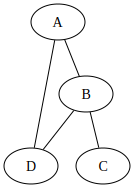

In [2]:
# Exemple
G = Graphe()
for s in ['A','B','C','D']: # ces deux instructions ne sont pas utilies
    G.ajoute_sommet(s)      # puisque la méthode ajoute_arete permet d'ajouter également les sommets
G.ajoute_arete("A","B")
G.ajoute_arete("A","D")
G.ajoute_arete("B","C")
G.ajoute_arete("D","B")
G.affiche()

#### Question 2
Compléter la méthode `arete` de la classe Graphe plus haut puis la tester

In [ ]:
# Jeu de tests de la méthode arete (pensez à tester l'arête entre s et t et aussi entre t et s)


#### Question 3
Compléter la méthode `sommets` de la classe Graphe plus haut puis la tester

In [ ]:
# test avec la méthode sommets


#### Question 4
Compléter la méthode `voisins` de la classe Graphe plus haut puis la tester

In [ ]:
# Jeu de tests avec la méthode voisins


#### Question 5
Compléter la méthode `degre` de la classe Graphe plus haut puis la tester

In [ ]:
# Jeu de tests avec la méthode degre


#### Question 6
Compléter la méthode `nb_aretes` de la classe Graphe plus haut puis la tester

In [ ]:
# Test avec la méthode nb_aretes


#### Question 7
Utilisez la classe précédente pour créer le graphe `G1` ci-dessous.
![Graphe_abcdefgh.png](https://ericecmorlaix.github.io/img/Graphe_abcdefgh.png)

In [ ]:
# Votre code ici.
G1 = ...

In [3]:
# Test des différentes méthodes précédentes
# permet de voir que vos méthodes ont l'air correctes, c'est le cas si cette cellule ne renvoie pas d'erreur
GTestBis=Graphe()
for i in range(0,10,2):
    for j in range(1,10,2):
        GTestBis.ajoute_arete(i,j)
assert [GTestBis.arete(i,j) for i in range(10) for j in range(10)]==[(i-j)%2==1 for i in range(10) for j in range(10)]
assert [GTestBis.voisins(i) for i in range(10)]==[[1, 3, 5, 7, 9], [0, 2, 4, 6, 8], [1, 3, 5, 7, 9], [0, 2, 4, 6, 8], [1, 3, 5, 7, 9], [0, 2, 4, 6, 8], [1, 3, 5, 7, 9], [0, 2, 4, 6, 8], [1, 3, 5, 7, 9], [0, 2, 4, 6, 8]]
assert [GTestBis.degre(i) for i in range(10)]==[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
assert GTestBis.nb_aretes()==25

## Implémentation d'un graphe orienté avec un dictionnaire d'adjacence

<div class="alert alert-warning" role="alert">
    
### Exercice 3
On considère la classe `DiGraphe` ci-dessous qu'il faudra **compléter et tester au fur et à mesure**.
    
On utilisera un dictionnaire d'adjacence : les clés seront les sommets du graphe et la valeur associée à une clé sera la liste de ses prédecesseurs.
    
</div>

In [4]:
from graphviz import Digraph

class DiGraphe:
    def __init__(self):
        ''' Le constructeur de la classe dont le seul attribut d'instance est le dictionnaire d'adjacence d '''
        self.d = dict()  # dictionnaire d'adjacence
    
    def ajoute_sommet(self, s):
        '''Ajoute le sommet s au graphe si celui-ci est un nouveau sommet'''
        if s not in self.d:
            self.d[s] = []  # Ajouter un sommet avec une liste vide de successeurs
    
    def ajoute_arc(self, s, t):
        '''Ajoute si nécessaire les sommets s et t puis crée si il n'existait pas un arc de s vers t'''
        if s not in self.d:
            self.ajoute_sommet(s)
        if t not in self.d:
            self.ajoute_sommet(t)
        
        # Ajouter l'arc de s vers t (ajouter t dans la liste des successeurs de s)
        if t not in self.d[s]:
            self.d[s].append(t)
    
    def arc(self, s, t):
        '''Renvoie True s'il y a un arc de s vers t, et False sinon'''
        return t in self.d.get(s, [])
    
    def sommets(self):
        '''Renvoie la liste de tous les sommets du graphe'''
        return list(self.d.keys())
    
    def successeurs(self, s):
        '''Renvoie la liste des successeurs de s'''
        return self.d.get(s, [])
    
    def degreSortant(self, s):
        '''Renvoie le nb d'arcs sortant de s'''
        return len(self.d.get(s, []))
    
    def degreEntrant(self, s):
        '''Renvoie le nb d'arcs entrant dans s'''
        # On doit compter combien de fois s apparaît comme successeur
        return sum(1 for voisins in self.d.values() if s in voisins)
    
    def affiche(self): 
        '''Affichage du graphe en utilisant le module graphviz'''
        dot = Digraph('G')
        for s in self.sommets():
            for t in self.sommets():
                if t in self.d[s]:
                    dot.edge(s, t)  # Ajouter un arc de s vers t
        return dot


#### Question 1
Compléter les méthodes `ajoute_sommet` puis `ajoute_arc` ci-dessus puis les tester avec l'exemple suivant

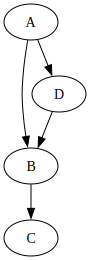

In [5]:
# Exemple
g = DiGraphe()
g.ajoute_arc("A","B")
g.ajoute_arc("A","D")
g.ajoute_arc("B","C")
g.ajoute_arc("D","B")
g.affiche()

#### Question 2
Compléter la méthode `arc` de la classe DiGraphe plus haut puis la tester

In [6]:
# Jeu de tests de la méthode arc (pensez à tester l'arc entre s et t et aussi entre t et s)


In [7]:
# Jeu de tests de la méthode arc (pensez à tester l'arc entre s et t et aussi entre t et s)


#### Question 3
Compléter la méthode `sommets` de la classe Graphe plus haut puis la tester

In [8]:
# test avec la méthode sommets


#### Question 4
Compléter la méthode `successeurs` de la classe DiGraphe plus haut puis la tester

In [9]:
# Jeu de tests avec la méthode voisins


#### Question 5
Compléter la méthode `degreSortant` de la classe DiGraphe plus haut puis la tester

In [10]:
# Jeu de tests avec la méthode degreSortant


#### Question 6
Compléter la méthode `degreEntrant` de la classe DiGraphe plus haut puis la tester

In [11]:
# Jeu de tests avec la méthode degreEntrant


In [12]:
# Test des différentes méthodes précédentes
# permet de voir que vos méthodes ont l'air correctes, c'est le cas si cette cellule ne renvoie pas d'erreur
GTestTer=DiGraphe()
for i in range(0,10,2):
    for j in range(1,10,2):
        GTestTer.ajoute_arc(i,j)
assert [GTestTer.arc(i,j) for i in range(10) for j in range(10)]==[(i%2==0 and j%2==1) for i in range(10) for j in range(10)]
assert [GTestTer.successeurs(i) for i in range(10)]==[[1, 3, 5, 7, 9], [], [1, 3, 5, 7, 9], [], [1, 3, 5, 7, 9], [], [1, 3, 5, 7, 9], [], [1, 3, 5, 7, 9], []]
assert [GTestTer.degreSortant(i) for i in range(10)]==[5, 0, 5, 0, 5, 0, 5, 0, 5, 0]
assert [GTestTer.degreEntrant(i) for i in range(10)]==[0, 5, 0, 5, 0, 5, 0, 5, 0, 5]